# Random Forest Algoritması

- Random Forest, birden çok karar ağacının (“forest” = orman) oluşturulduğu ve bu ağaçların birleştirilmiş tahminine dayanan bir topluluk (ensemble) yöntemidir. Yani Random Forest aslında birden fazla Decision Tree'nin birleşmesi ile oluşan daha genel bir yapıdır.

- Tek bir karar ağacı yerine birden fazla ağaç eğitilerek her ağacın yaptığı hataların ortalaması (regresyon için) veya çoğunluk oyu (sınıflandırma için) alınır. Böylece aşırı uyum (overfitting) riski azalır ve genelleme performansı artar.

### Temel Kavramlara Değinelim...

- **n_ensemble:** Ormandaki ağaç sayısını belirleyen parametredir.
- **max_depth:** Her bir ağacın maksimum derinliği belirleyen parametredir.
- **max_features:** Her bölünmede göz önüne alınacak özellik sayısı (sqrt, log2)

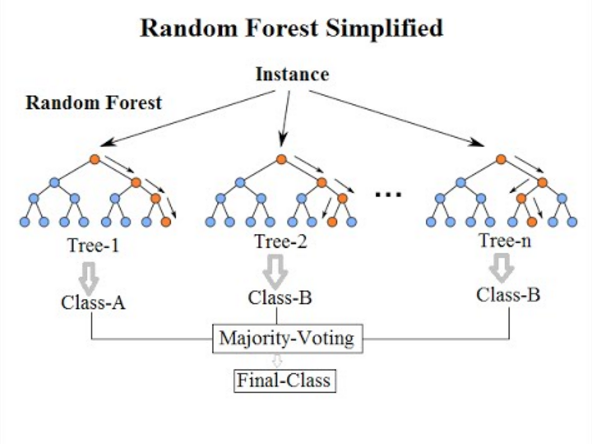

- Evett, görselde göreceğimiz üzere instance adı verdiğimiz bir yeni veri girişi yapılmakta. Peki ya sonra,

- Görselde göreceğiniz üzere n adet ağaç örneği bulunmaktadır. Bu n sayısı 3 olabilir 50 olabilir hatta 500 bile olabilir. Hatırlayalım birden fazla decision tree = random forest...

- Gelen instance için her bir ağaç bir tahminde bulunuyor. Mesela ilk ağaç A, ikinci ağaç B ve N. ağaç B tahmini veriyor.

- Alt kısımda “Majority‑Voting” kutusu, tüm ağaçların tahminlerini topluyor ve en çok oy alan sınıfı seçiyor.

### Biraz pratik yapalım...

In [1]:
import pandas as pd

In [2]:
# Öncelikle veri setimizi dataframe olarak okuyalım
df = pd.read_csv("dataset.csv")

In [3]:
df.head()

,What is your age group?,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,18-25,Student,Urban Area,More than 5 hours,Improved,Daily,"Yes, actively",Daily,LinkedIn,"Yes, negatively"
1,18-25,Student,Urban Area,3-5 hours,No Change,Never,"No, never",Daily,Others,Not sure
2,18-25,Student,Urban Area,3-5 hours,No Change,Rarely,Rarely,Daily,Facebook,Not sure
3,18-25,Student,Urban Area,3-5 hours,Worsened,Never,"No, never",Daily,Facebook,"Yes, negatively"
4,18-25,Student,Suburban Area,3-5 hours,Improved,A few times a week,"Yes, actively",Daily,Facebook,"Yes, negatively"


In [4]:
# info metodu ile veri setinin genel yapısını inceleyelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   What is your age group?                                       49 non-null     object
 1     What is your occupation?                                    49 non-null     object
 2   Where do you live?                                            49 non-null     object
 3   How many hours per day do you spend on social media?          49 non-null     object
 4   How has social media affected your real-life relationships?   49 non-null     object
 5   How frequently do you use email for communication?            49 non-null     object
 6   Do you use LinkedIn for professional networking?              49 non-null     object
 7   How often do you use WhatsApp for communication?              49 non-null     obje

In [5]:
# peki null veri var mı?
df.isnull().sum()

What is your age group?                                         0
  What is your occupation?                                      0
Where do you live?                                              0
How many hours per day do you spend on social media?            0
How has social media affected your real-life relationships?     0
How frequently do you use email for communication?              0
Do you use LinkedIn for professional networking?                0
How often do you use WhatsApp for communication?                0
Which social media platforms do you use the most?               0
Do you feel that social media affects your mental health?       0
dtype: int64

In [6]:
# Ayrıca veri setinde yer alan What is your age? değeri statik olarak 18-25 yaş aralığında olduğu için bu veriyi
# kaldırabiliriz. Bu veri seti üzerinde çalışırken bu bilgiye ihtiyacımız yok.
df.drop(columns=["What is your age group? "], inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoder sınıfını kullanarak kategorik verileri sayısal verilere dönüştürelim
le = LabelEncoder()
df["  What is your occupation? "] = le.fit_transform(df["  What is your occupation? "])
df["Where do you live? "] = le.fit_transform(df["Where do you live? "])
df["How many hours per day do you spend on social media? "] = le.fit_transform(df["How many hours per day do you spend on social media? "])
df["How has social media affected your real-life relationships? "] = le.fit_transform(df["How has social media affected your real-life relationships? "])
df["How frequently do you use email for communication? "] = le.fit_transform(df["How frequently do you use email for communication? "])
df["Do you use LinkedIn for professional networking?  "] = le.fit_transform(df["Do you use LinkedIn for professional networking?  "])
df["How often do you use WhatsApp for communication? "] = le.fit_transform(df["How often do you use WhatsApp for communication? "])
df["Which social media platforms do you use the most?  "] = le.fit_transform(df["Which social media platforms do you use the most?  "])
df["Do you feel that social media affects your mental health?  "] = le.fit_transform(df["Do you feel that social media affects your mental health?  "])


In [8]:
# Dataframe'in ilk 5 satırını görelim
df.head()

,What is your occupation?,Where do you live?,How many hours per day do you spend on social media?,How has social media affected your real-life relationships?,How frequently do you use email for communication?,Do you use LinkedIn for professional networking?,How often do you use WhatsApp for communication?,Which social media platforms do you use the most?,Do you feel that social media affects your mental health?
0,3,2,3,0,1,3,1,2,2
1,3,2,1,1,2,0,1,3,1
2,3,2,1,1,3,1,1,0,1
3,3,2,1,2,2,0,1,0,2
4,3,1,1,0,0,3,1,0,2


In [9]:
from sklearn.model_selection import train_test_split
# Veri setini eğitim ve test setlerine ayıralım
X = df.drop(columns=["Do you feel that social media affects your mental health?  "])
y = df["Do you feel that social media affects your mental health?  "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
# Karar ağaçları regresyon modelini oluşturalım
model = RandomForestClassifier(n_estimators=100, random_state=42)
# Modeli eğitim verisi ile eğitelim
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
model.score(X_test, y_test)

Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.33      0.40         3
           2       0.43      0.60      0.50         5
           3       0.00      0.00      0.00         1

    accuracy                           0.40        10
   macro avg       0.23      0.23      0.23        10
weighted avg       0.36      0.40      0.37        10

Confusion Matrix:
 [[0 0 1 0]
 [0 1 2 0]
 [0 1 3 1]
 [0 0 1 0]]


/opt/anaconda3/envs/python_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/python_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/python_a/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

0.4